<div style="text-align: center; font-size: 50px;font-family: 'Arial', sans-serif;">
    PROYECTO HACIENDA BRASILEÑA
</div>

### Importación de las librerias necesarias

In [119]:
import pandas as pd
import numpy as np
from src import soporte_limpieza as sl
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Importación de archivos, con el encoding latin y el separador ;

In [120]:
dir_list = os.listdir("../datos/")
dir_list = dir_list[:-1]

In [121]:
dir_list

['datos-2013.csv',
 'datos-2014.csv',
 'datos-2015.csv',
 'datos-2016.csv',
 'datos-2017.csv',
 'datos-2018.csv',
 'datos-2019.csv',
 'datos-2020.csv',
 'datos-2021.csv']

In [122]:
diccionario_dfs = {}

In [123]:
diccionario_extraido = sl.exctraccion_csv(dir_list)
diccionario_extraido

{'2013df':                             NOME ÓRGÃO SUPERIOR  CÓDIGO ÓRGÃO  \
 CÓDIGO ÓRGÃO SUPERIOR                                           
 63000                  Advocacia-Geral da União         63000   
 63000                  Advocacia-Geral da União         63000   
 63000                  Advocacia-Geral da União         63000   
 63000                  Advocacia-Geral da União         63000   
 63000                  Advocacia-Geral da União         63000   
 ...                                         ...           ...   
 20000                  Presidência da República         20101   
 20000                  Presidência da República         64000   
 20000                  Presidência da República         20101   
 20000                  Presidência da República         20116   
 20000                  Presidência da República         24208   
 
                                                               NOME ÓRGÃO  \
 CÓDIGO ÓRGÃO SUPERIOR                               

In [124]:
diccionario_extraido ["2013df"].head(2)

,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
CÓDIGO ÓRGÃO SUPERIOR,,,,,,,,,,,,,,,
63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0,0,"1297,13",0,31/12/2013,2013
63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0,0,"26666621,42",0,31/12/2013,2013


In [125]:
for key,valor in diccionario_extraido.items():
    print(f"El dataframe {key} tiene el siguiente shape {valor.shape}")

El dataframe 2013df tiene el siguiente shape (4498, 15)
El dataframe 2014df tiene el siguiente shape (4553, 15)
El dataframe 2015df tiene el siguiente shape (4523, 15)
El dataframe 2016df tiene el siguiente shape (194533, 15)
El dataframe 2017df tiene el siguiente shape (190479, 15)
El dataframe 2018df tiene el siguiente shape (173944, 15)
El dataframe 2019df tiene el siguiente shape (176828, 15)
El dataframe 2020df tiene el siguiente shape (142348, 15)
El dataframe 2021df tiene el siguiente shape (134593, 15)


## Diccionario para cambiar el nombre de las columnas a idioma español

In [126]:
traducciones = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'Codigo_del_Órgano_Superior',
    'NOME ÓRGÃO SUPERIOR': 'Nombre_del_Órgano_Superior',
    'CÓDIGO ÓRGÃO': 'Código_del_Órgano',
    'NOME ÓRGÃO': 'Nombre_del_Órgano',
    'CÓDIGO UNIDADE GESTORA': 'Código_de_la_Unidad_Gestora',
    'NOME UNIDADE GESTORA': 'Nombre_de_la_Unidad_Gestora',
    'CATEGORIA ECONÔMICA': 'Categoría_Económica',
    'ORIGEM RECEITA': 'Origen_del_Ingreso',
    'ESPÉCIE RECEITA': 'Especie_de_Ingreso',
    'DETALHAMENTO': 'Desglose',
    'VALOR PREVISTO ATUALIZADO': 'Valor_Previsto_Actualizado',
    'VALOR LANÇADO': 'Valor_Registrado',
    'VALOR REALIZADO': 'Valor_Realizado',
    'PERCENTUAL REALIZADO': 'Porcentaje_Realizado',
    'DATA LANÇAMENTO': 'Fecha_de_Registro',
    'ANO EXERCÍCIO': 'Año_de_Ejercicio'
}

In [127]:
diccionario_extraido ["2014df"].head(2)

,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
CÓDIGO ÓRGÃO SUPERIOR,,,,,,,,,,,,,,,
63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,RECEITA DE HONORÁRIOS DE ADVOGADOS,"0,00","0,00","46699948,08","0,00",31/12/2014,2014
63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",MULTAS E JUROS PREVISTOS EM CONTRATOS,"0,00","0,00","15920,83","0,00",31/12/2014,2014


In [128]:
diccionario_extraido.values()

dict_values([                            NOME ÓRGÃO SUPERIOR  CÓDIGO ÓRGÃO  \
CÓDIGO ÓRGÃO SUPERIOR                                           
63000                  Advocacia-Geral da União         63000   
63000                  Advocacia-Geral da União         63000   
63000                  Advocacia-Geral da União         63000   
63000                  Advocacia-Geral da União         63000   
63000                  Advocacia-Geral da União         63000   
...                                         ...           ...   
20000                  Presidência da República         20101   
20000                  Presidência da República         64000   
20000                  Presidência da República         20101   
20000                  Presidência da República         20116   
20000                  Presidência da República         24208   

                                                              NOME ÓRGÃO  \
CÓDIGO ÓRGÃO SUPERIOR                                            

In [129]:
df_concat = pd.concat(list(diccionario_extraido.values()), axis=0)
df_concat.reset_index()


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0,0,"1297,13",0,31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0,0,"26666621,42",0,31/12/2013,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0,0,"301251,13",0,31/12/2013,2013
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0,0,"1855,58",0,31/12/2013,2013
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0,0,"52140,68",0,31/12/2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026294,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,TITULOS DE RESPONS.TES.NAC.-MERC.INT.-PRINC.,"16940891,00","0,00","0,00","0,00",23/04/2021,2021
1026295,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","0,00","0,00","372,90","0,00",22/11/2021,2021
1026296,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","200000,00","0,00","0,00","0,00",23/04/2021,2021
1026297,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","0,00","0,00","1000000,00","0,00",10/05/2021,2021


In [130]:
df_concat = df_concat.rename(columns=traducciones).reset_index()

In [131]:
df_concat.head(1)

,CÓDIGO ÓRGÃO SUPERIOR,Nombre_del_Órgano_Superior,Código_del_Órgano,Nombre_del_Órgano,Código_de_la_Unidad_Gestora,Nombre_de_la_Unidad_Gestora,Categoría_Económica,Origen_del_Ingreso,Especie_de_Ingreso,Desglose,Valor_Previsto_Actualizado,Valor_Registrado,Valor_Realizado,Porcentaje_Realizado,Fecha_de_Registro,Año_de_Ejercicio
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0,0,"1297,13",0,31/12/2013,2013


In [132]:
df_concat.to_csv('archivo_concatenado.csv', index=False)

In [133]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR        1026299 non-null  int64 
 1   Nombre_del_Órgano_Superior   1026299 non-null  object
 2   Código_del_Órgano            1026299 non-null  int64 
 3   Nombre_del_Órgano            1026299 non-null  object
 4   Código_de_la_Unidad_Gestora  1026299 non-null  int64 
 5   Nombre_de_la_Unidad_Gestora  1026299 non-null  object
 6   Categoría_Económica          1026299 non-null  object
 7   Origen_del_Ingreso           1026299 non-null  object
 8   Especie_de_Ingreso           1026299 non-null  object
 9   Desglose                     1026299 non-null  object
 10  Valor_Previsto_Actualizado   1026299 non-null  object
 11  Valor_Registrado             1026299 non-null  object
 12  Valor_Realizado              1026299 non-null  object
 1

In [134]:
df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
CÓDIGO ÓRGÃO SUPERIOR,1026299.0,32050.523288,10612.547085,20000.0,25000.0,26000.0,39000.0,81000.0
Código_del_Órgano,1026299.0,31435.161341,10382.647574,20101.0,25201.0,26298.0,36000.0,91214.0
Código_de_la_Unidad_Gestora,1026299.0,231293.743317,144178.420681,110005.0,154003.0,170013.0,250088.0,913001.0
Año_de_Ejercicio,1026299.0,2018.225555,1.737966,2013.0,2017.0,2018.0,2020.0,2021.0


In [135]:
df_concat.describe(include="O").T

,count,unique,top,freq
Nombre_del_Órgano_Superior,1026299,29,Ministério da Educação,361891
Nombre_del_Órgano,1026299,294,Ministério da Economia - Unidades com vínculo ...,119811
Nombre_de_la_Unidad_Gestora,1026299,356,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481
Categoría_Económica,1026299,5,Receitas Correntes,979596
Origen_del_Ingreso,1026299,15,Outras Receitas Correntes,322907
Especie_de_Ingreso,1026299,63,Serviços Administrativos e Comerciais Gerais,278157
Desglose,1026299,1886,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039
Valor_Previsto_Actualizado,1026299,18737,"0,00",1004834
Valor_Registrado,1026299,6791,"0,00",1014634
Valor_Realizado,1026299,606175,"0,00",20303


## Normalizacion de datos.

In [136]:
df_concat["Valor_Registrado"].unique()

array(['0', '36048631136', '10598172567', ..., '98529,36', '-41518,08',
       '41518,08'], dtype=object)

In [137]:
 
df_concat["Valor_Registrado"] = df_concat["Valor_Registrado"].map(sl.convertir_comas_a_puntos)

In [138]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   CÓDIGO ÓRGÃO SUPERIOR        1026299 non-null  int64  
 1   Nombre_del_Órgano_Superior   1026299 non-null  object 
 2   Código_del_Órgano            1026299 non-null  int64  
 3   Nombre_del_Órgano            1026299 non-null  object 
 4   Código_de_la_Unidad_Gestora  1026299 non-null  int64  
 5   Nombre_de_la_Unidad_Gestora  1026299 non-null  object 
 6   Categoría_Económica          1026299 non-null  object 
 7   Origen_del_Ingreso           1026299 non-null  object 
 8   Especie_de_Ingreso           1026299 non-null  object 
 9   Desglose                     1026299 non-null  object 
 10  Valor_Previsto_Actualizado   1026299 non-null  object 
 11  Valor_Registrado             1026299 non-null  float64
 12  Valor_Realizado              1026299 non-n

In [139]:
df_concat["Valor_Realizado"] = df_concat["Valor_Realizado"].map(sl.convertir_comas_a_puntos)

In [140]:
df_concat["Porcentaje_Realizado"].unique()

array([0, 154, 54, ..., '-282,00', '460,00', '39232,00'], dtype=object)

In [141]:
df_concat["Valor_Previsto_Actualizado"] = df_concat["Valor_Previsto_Actualizado"].map(sl.convertir_comas_a_puntos)

In [142]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   CÓDIGO ÓRGÃO SUPERIOR        1026299 non-null  int64  
 1   Nombre_del_Órgano_Superior   1026299 non-null  object 
 2   Código_del_Órgano            1026299 non-null  int64  
 3   Nombre_del_Órgano            1026299 non-null  object 
 4   Código_de_la_Unidad_Gestora  1026299 non-null  int64  
 5   Nombre_de_la_Unidad_Gestora  1026299 non-null  object 
 6   Categoría_Económica          1026299 non-null  object 
 7   Origen_del_Ingreso           1026299 non-null  object 
 8   Especie_de_Ingreso           1026299 non-null  object 
 9   Desglose                     1026299 non-null  object 
 10  Valor_Previsto_Actualizado   1026299 non-null  float64
 11  Valor_Registrado             1026299 non-null  float64
 12  Valor_Realizado              1026299 non-n

In [143]:
df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
CÓDIGO ÓRGÃO SUPERIOR,1026299.0,3.205052e+04,1.061255e+04,2.000000e+04,25000.000,26000.00,39000.000,8.100000e+04
Código_del_Órgano,1026299.0,3.143516e+04,1.038265e+04,2.010100e+04,25201.000,26298.00,36000.000,9.121400e+04
Código_de_la_Unidad_Gestora,1026299.0,2.312937e+05,1.441784e+05,1.100050e+05,154003.000,170013.00,250088.000,9.130010e+05
Valor_Previsto_Actualizado,1026299.0,2.761142e+07,3.393367e+09,-2.147737e+08,0.000,0.00,0.000,1.603522e+12
Valor_Registrado,1026299.0,5.242806e+06,8.108837e+08,-1.483473e+11,0.000,0.00,0.000,3.571607e+11
Valor_Realizado,1026299.0,2.498042e+07,1.406892e+09,-1.562859e+11,260.905,3022.32,40853.855,7.711177e+11
Año_de_Ejercicio,1026299.0,2.018226e+03,1.737966e+00,2.013000e+03,2017.000,2018.00,2020.000,2.021000e+03


In [144]:
df_concat["Año_de_Ejercicio"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [145]:
duplicados = df_concat.duplicated().sum()
duplicados

np.int64(0)

## 

## No hay duplicados en el df_concat

## sospechosos de robar

In [146]:
df_concat["Discrepancia"] = df_concat["Valor_Registrado"] - df_concat["Valor_Realizado"]
# Filtrar unidades gestoras sospechosas
sospechosos = df_concat[((df_concat["Valor_Realizado"] == 0) & (df_concat["Valor_Registrado"] > 0))].reset_index()  # Realizado = 0 pero Registrado > 

sospechosos

,index,CÓDIGO ÓRGÃO SUPERIOR,Nombre_del_Órgano_Superior,Código_del_Órgano,Nombre_del_Órgano,Código_de_la_Unidad_Gestora,Nombre_de_la_Unidad_Gestora,Categoría_Económica,Origen_del_Ingreso,Especie_de_Ingreso,Desglose,Valor_Previsto_Actualizado,Valor_Registrado,Valor_Realizado,Porcentaje_Realizado,Fecha_de_Registro,Año_de_Ejercicio,Discrepancia
0,590,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170010,SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB,Receitas Correntes,"Impostos, Taxas e Contribuições de Melhoria",Impostos,RETIDO NAS FONTES - TRABALHO,0.0,3.604863e+10,0.0,0,31/12/2013,2013,3.604863e+10
1,616,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170010,SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB,Receitas Correntes,"Impostos, Taxas e Contribuições de Melhoria",Impostos,IOF - DEMAIS OPERACOES,0.0,1.059817e+10,0.0,0,31/12/2013,2013,1.059817e+10
2,619,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170010,SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB,Receitas Correntes,Contribuições,Contribuições sociais,REC.DO PRINCIPAL DA CONTR. P FIN. SEG. SOCIAL,0.0,1.896740e+11,0.0,0,31/12/2013,2013,1.896740e+11
3,638,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170010,SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB,Receitas Correntes,"Impostos, Taxas e Contribuições de Melhoria",Impostos,REC. DO PRINCIPAL DO IMPOSTO S/ A EXPORTACAO,0.0,2.584059e+08,0.0,0,31/12/2013,2013,2.584059e+08
4,648,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170010,SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB,Receitas Correntes,Contribuições,Contribuições econômicas,LOJAS FRANCAS ENTREP.ADUAN. DEP.ALFANDEGADOS,0.0,2.232963e+06,0.0,0,31/12/2013,2013,2.232963e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1012994,32000,Ministério de Minas e Energia,32210,Agência Nacional de Energia Elétrica,323028,AGENCIA NACIONAL DE ENERGIA ELETRICA,Receitas Correntes,Receita Patrimonial,Exploração do patrimônio imobiliário do Estad,CONC/PERM/AUT/CESSAO DIR.USO IMOV.PUB-PRINC.,0.0,6.299979e+07,0.0,"0,00",NaN,2021,6.299979e+07
3814,1013991,32000,Ministério de Minas e Energia,32396,Agência Nacional de Mineração,323100,SETORIAL ORCAMENTARIA E FINANCEIRA - ANM,Receitas Correntes,"Impostos, Taxas e Contribuições de Melhoria",Taxas,"TAXAS INSPECAO,CONTROLE E FISCALIZACAO-PRINC.",0.0,2.735235e+09,0.0,"0,00",NaN,2021,2.735235e+09
3815,1025473,54000,Ministério do Turismo,20203,Agência Nacional do Cinema,203003,AGENCIA NACIONAL DO CINEMA,Receitas Correntes,Contribuições,Contribuições econômicas,RECEITA VEICULACAO DE OBRAS CINEMATOGRAFICAS,0.0,5.074345e+06,0.0,"0,00",NaN,2021,5.074345e+06
3816,1025475,54000,Ministério do Turismo,20203,Agência Nacional do Cinema,203003,AGENCIA NACIONAL DO CINEMA,Receitas Correntes,Contribuições,Contribuições econômicas,CONDECINE-PRINCIPAL,0.0,9.852936e+04,0.0,"0,00",04/11/2021,2021,9.852936e+04


## Filtrado datos

In [147]:
df_concat["Desviacion"] = df_concat["Valor_Realizado"] - df_concat["Valor_Previsto_Actualizado"]
df_concat.head()

,CÓDIGO ÓRGÃO SUPERIOR,Nombre_del_Órgano_Superior,Código_del_Órgano,Nombre_del_Órgano,Código_de_la_Unidad_Gestora,Nombre_de_la_Unidad_Gestora,Categoría_Económica,Origen_del_Ingreso,Especie_de_Ingreso,Desglose,Valor_Previsto_Actualizado,Valor_Registrado,Valor_Realizado,Porcentaje_Realizado,Fecha_de_Registro,Año_de_Ejercicio,Discrepancia,Desviacion
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0,31/12/2013,2013,-1297.13,1297.13
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0,31/12/2013,2013,-26666621.42,26666621.42
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,0,31/12/2013,2013,-301251.13,301251.13
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,0,31/12/2013,2013,-1855.58,1855.58
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,0,31/12/2013,2013,-52140.68,52140.68


In [148]:
df_recaudacion_año = df_concat.groupby("Año_de_Ejercicio")["Valor_Realizado"].sum().reset_index().sort_values("Valor_Realizado",ascending=False)
df_recaudacion_año

,Año_de_Ejercicio,Valor_Realizado
8,2021,3.876372e+12
7,2020,3.631449e+12
6,2019,2.991565e+12
5,2018,2.942388e+12
3,2016,2.839712e+12
2,2015,2.665685e+12
4,2017,2.558047e+12
1,2014,2.238551e+12
0,2013,1.893613e+12


Text(0, 0.5, 'Recaudación')

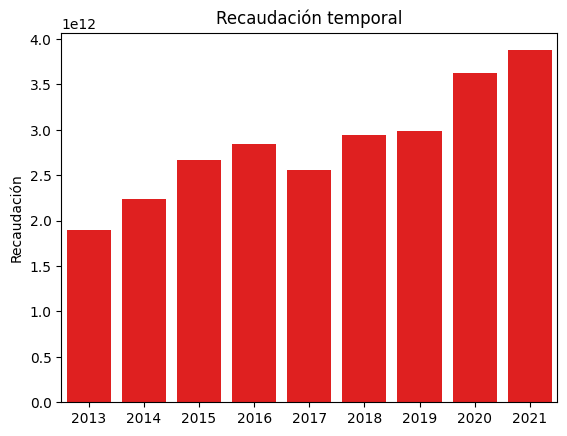

In [149]:
sns.barplot(x= "Año_de_Ejercicio",
            y="Valor_Realizado",
            data= df_recaudacion_año,
            color ="red",
)

plt.title("Recaudación temporal")
plt.xlabel("")
plt.ylabel("Recaudación")

In [150]:
df_concat ["Desviacion"] = df_concat ["Valor_Previsto_Actualizado"] - df_concat ["Valor_Realizado"]
df_concat.head (2)

,CÓDIGO ÓRGÃO SUPERIOR,Nombre_del_Órgano_Superior,Código_del_Órgano,Nombre_del_Órgano,Código_de_la_Unidad_Gestora,Nombre_de_la_Unidad_Gestora,Categoría_Económica,Origen_del_Ingreso,Especie_de_Ingreso,Desglose,Valor_Previsto_Actualizado,Valor_Registrado,Valor_Realizado,Porcentaje_Realizado,Fecha_de_Registro,Año_de_Ejercicio,Discrepancia,Desviacion
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0,31/12/2013,2013,-1297.13,-1297.13
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0,31/12/2013,2013,-26666621.42,-26666621.42


In [151]:
df_desviacion = df_concat.groupby("CÓDIGO ÓRGÃO SUPERIOR")["Desviacion"].mean().sort_values(ascending=False).reset_index()
df_desviacion

,CÓDIGO ÓRGÃO SUPERIOR,Desviacion
0,20000,9.573749e+06
1,25000,8.559200e+06
2,55000,6.581128e+06
3,32000,4.929668e+06
4,53000,3.257777e+06
5,37000,2.909277e+06
6,38000,1.232792e+06
7,26000,1.072136e+06
8,52000,9.828993e+05
9,63000,8.697334e+05


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '20000'),
  Text(1, 0, '22000'),
  Text(2, 0, '24000'),
  Text(3, 0, '25000'),
  Text(4, 0, '26000'),
  Text(5, 0, '30000'),
  Text(6, 0, '32000'),
  Text(7, 0, '33000'),
  Text(8, 0, '35000'),
  Text(9, 0, '36000'),
  Text(10, 0, '37000'),
  Text(11, 0, '38000'),
  Text(12, 0, '39000'),
  Text(13, 0, '41000'),
  Text(14, 0, '44000'),
  Text(15, 0, '49000'),
  Text(16, 0, '51000'),
  Text(17, 0, '52000'),
  Text(18, 0, '53000'),
  Text(19, 0, '54000'),
  Text(20, 0, '55000'),
  Text(21, 0, '57000'),
  Text(22, 0, '58000'),
  Text(23, 0, '63000'),
  Text(24, 0, '81000')])

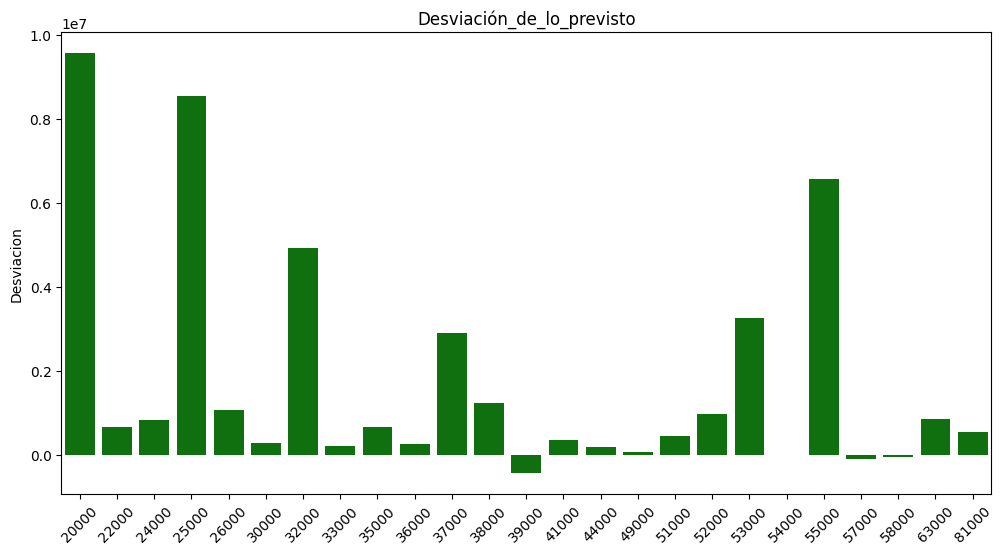

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(x= "CÓDIGO ÓRGÃO SUPERIOR",
            y="Desviacion",
            data= df_desviacion,
            color ="green",
)

plt.title('Desviación_de_lo_previsto')
plt.xlabel('')
plt.ylabel('Desviacion')
plt.xticks(rotation=45, fontsize=10)

In [153]:
df_concat["EFICIENCIA"] = (df_concat["Valor_Realizado"] / df_concat["Valor_Registrado"]) * 100
df_concat["EJECUCION"] = (df_concat["Valor_Registrado"] / df_concat["Valor_Previsto_Actualizado"]) * 100

In [154]:
df_concat = df_concat.dropna(subset=["Valor_Realizado", "Valor_Registrado", "Valor_Previsto_Actualizado"])

In [155]:
result = df_concat.groupby(["Nombre_del_Órgano", "Código_de_la_Unidad_Gestora"]).agg(
    RECAUDACION=("Valor_Realizado", "sum"),
    EJECUCION=("EJECUCION", "mean"),
    EFICIENCIA=("EFICIENCIA", "mean")
).reset_index()

result

,Nombre_del_Órgano,Código_de_la_Unidad_Gestora,RECAUDACION,EJECUCION,EFICIENCIA
0,Advocacia-Geral da União - Unidades com víncul...,110060,3.349630e+08,0.0,NaN
1,Agência Espacial Brasileira,203001,2.606309e+07,0.0,NaN
2,Agência Nacional de Aviação Civil,113214,3.251252e+09,0.0,NaN
3,Agência Nacional de Aviação Civil,113243,2.917915e+05,NaN,inf
4,Agência Nacional de Energia Elétrica,323028,6.109310e+10,NaN,NaN
...,...,...,...,...,...
366,Universidade Federal dos Vales do Jequitinhonh...,153036,1.356103e+07,inf,NaN
367,Universidade Tecnológica Federal do Paraná,153019,6.567532e+07,0.0,NaN
368,Universidade da Integração Internacional da Lu...,158565,6.996699e+06,0.0,NaN
369,"VALEC Engenharia, Construções e Ferrovias S.A.",275075,5.709964e+07,0.0,NaN
